In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
df = pd.read_csv("C:\Fake D\DS shii\ipc.csv")

In [88]:
df.set_index("Temps",inplace=True)

In [89]:
#Stat descriptive
df.describe()

,IPC
count,142.000000
mean,237.047817
std,13.367631
min,212.500000
25%,227.962500
50%,237.115000
75%,247.720000
max,260.820000


<Axes: xlabel='Temps'>

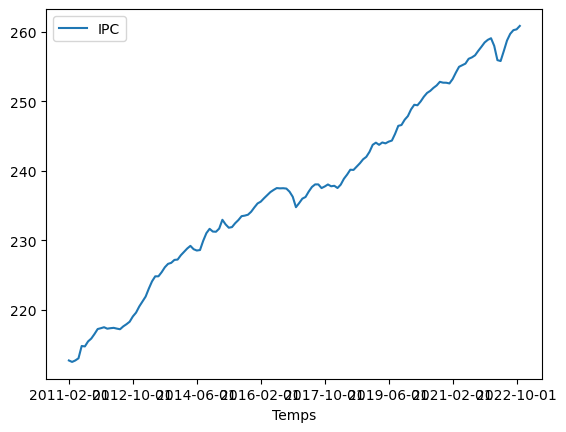

In [90]:
#illustration graphique
df.plot(kind='line')

In [91]:
from statsmodels.tsa.stattools import adfuller
time_series = df['IPC']
result = adfuller(time_series)
print('Statistique de test :', result[0])
print('P-valeur :', result[1])


Statistique de test : -0.5463976670992453
P-valeur : 0.8826399195970647


In [92]:
result = adfuller(df.diff().dropna())
print('Statistique de test :', result[0])
print('P-valeur :', result[1])


Statistique de test : -7.78274972119431
P-valeur : 8.332893878881027e-12


In [93]:
serie_diff = df.diff().dropna()

<Axes: xlabel='Temps'>

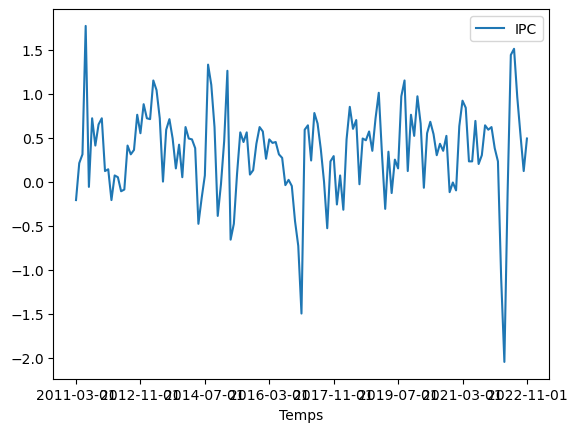

In [94]:
serie_diff.plot(kind='line')

c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


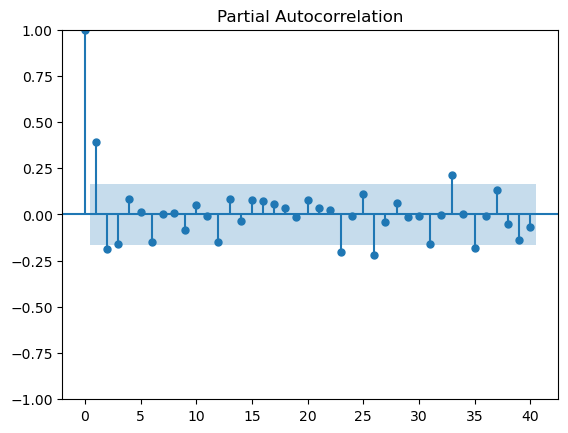

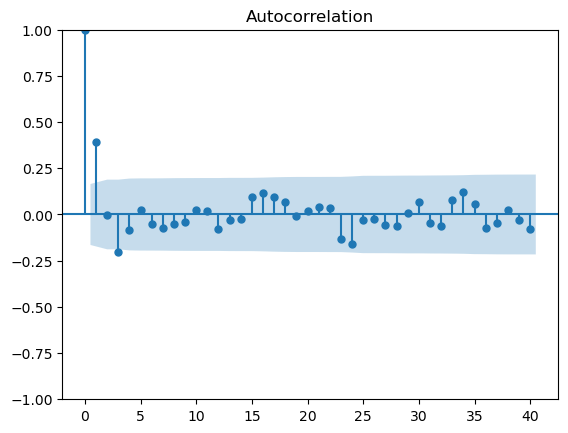

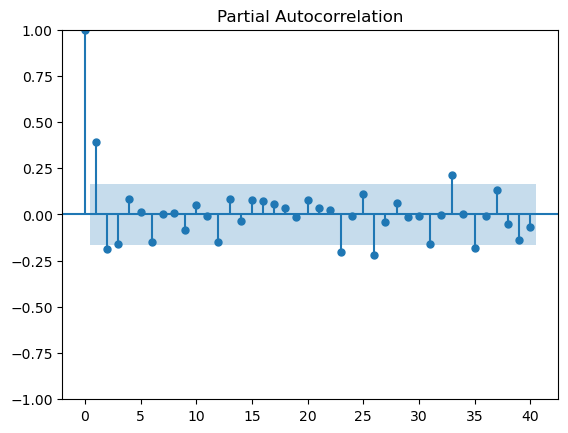

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(serie_diff['IPC'], lags=40, alpha=0.05)
plot_pacf(serie_diff['IPC'], lags=40, alpha=0.05)


In [96]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(serie_diff['IPC'], order=(4, 1, 1))
results = model.fit()
print(results.summary())


c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    IPC   No. Observations:                  141
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -92.577
Date:                Mon, 25 Dec 2023   AIC                            197.153
Time:                        23:16:16   BIC                            214.803
Sample:                    03-01-2011   HQIC                           204.325
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4528      0.073      6.214      0.000       0.310       0.596
ar.L2         -0.1005      0.098     -1.028      0.304      -0.292       0.091
ar.L3         -0.1853      0.110     -1.691      0.0

In [97]:
from scipy import stats
residuals = results.resid
shapiro_test = stats.shapiro(residuals)
print(shapiro_test.pvalue)

5.5570213589817286e-05


((array([-2.58253477, -2.26028402, -2.07537922, -1.94231337, -1.83674906,
         -1.74840038, -1.67190784, -1.6041079 , -1.54297005, -1.48710979,
         -1.4355389 , -1.38752621, -1.34251479, -1.3000702 , -1.25984666,
         -1.22156424, -1.18499296, -1.14994141, -1.1162485 , -1.0837773 ,
         -1.05241034, -1.02204606, -0.99259601, -0.96398261, -0.93613746,
         -0.90899987, -0.88251575, -0.85663662, -0.83131888, -0.80652311,
         -0.78221359, -0.75835777, -0.73492593, -0.71189083, -0.68922744,
         -0.66691265, -0.64492514, -0.62324509, -0.60185412, -0.58073507,
         -0.55987193, -0.5392497 , -0.51885431, -0.49867251, -0.47869182,
         -0.45890044, -0.43928722, -0.41984155, -0.40055337, -0.38141308,
         -0.36241152, -0.34353993, -0.32478992, -0.3061534 , -0.28762263,
         -0.2691901 , -0.25084859, -0.23259109, -0.2144108 , -0.19630111,
         -0.17825558, -0.16026791, -0.14233195, -0.12444167, -0.10659113,
         -0.08877449, -0.07098599, -0.

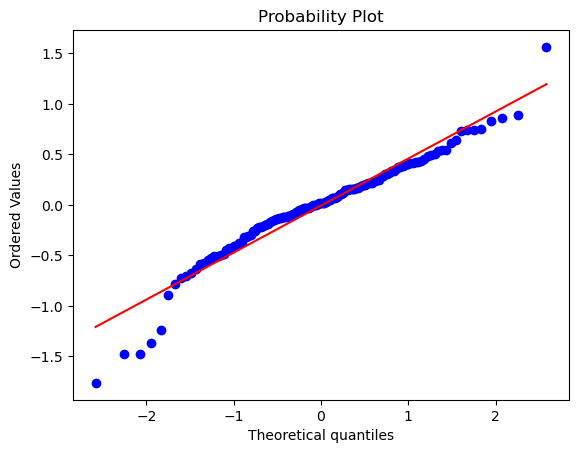

In [98]:
stats.probplot(residuals, dist="norm", plot=plt)


c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Adam-\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


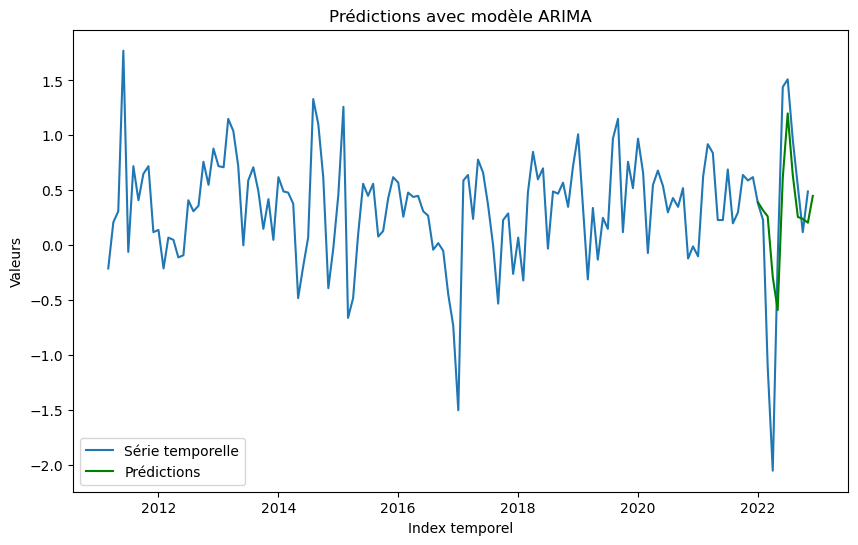

In [99]:
serie_diff.index = pd.to_datetime(serie_diff.index)



model = ARIMA(serie_diff, order=(4, 1, 1))
results = model.fit()

# Prédiction pour la plage de pas de temps de 130 à 140
forecast = results.get_prediction(start=130, end=141, dynamic=False)  # Prédiction pour l'index 130 à 140

# Récupération des prédictions
predicted_values = forecast.predicted_mean

# Plot de la série temporelle et des valeurs prédites
plt.figure(figsize=(10, 6))
plt.plot(serie_diff, label='Série temporelle')
plt.plot(predicted_values.index, predicted_values.values, color='green', linewidth=1.5, label='Prédictions')
plt.title('Prédictions avec modèle ARIMA')
plt.xlabel('Index temporel')
plt.ylabel('Valeurs')
plt.legend()
plt.show()